İlk iki derste, yoğun katmanlar yığınlarından tam bağlantılı ağlar oluşturmayı öğrendik. İlk oluşturulduğunda, ağın tüm ağırlıkları rastgele olarak ayarlanır -- yani ağ henüz "hiçbir şey bilmiyor."

Evet, başlangıçta ağın ağırlıkları rastgele olarak ayarlanır. Bu, eğitim sürecinde ağın verilerden öğrenebilmesi için yapılır. Eğitim süreci boyunca, bu rastgele ağırlıklar verilerden öğrenilen bilgilere göre ayarlanır, böylece ağ daha iyi tahminler yapabilir.

Bu derste bir sinir ağının nasıl öğrendiğini, bir sinir ağının nasıl eğitildiğini göreceğiz.

Makine öğrenmesindeki gibi, training data ları ayarlayacağız. Ağın eğitimi, ağırlıklarını, girdileri hedefe dönüştürebilecek şekilde ayarlamak anlamına gelir. Örneğin, 80 Cereals veri setinde, ağın 'şeker', 'lif' ve 'protein' gibi özellikleri alıp o tahılın 'kalori' miktarını tahmin etmesini istiyoruz. Başarılı bir şekilde eğitilmiş bir ağ, bu özellikler ile hedef arasındaki ilişkiyi, eğitim verilerinde ifade edildiği şekilde ağırlıklarına yansıtır.

Bu konuda iki bileşene daha ihtiyacımız var:

1. Ağın tahminlerinin ne kadar iyi olduğunu ölçen bir "kayıp fonksiyonu(loss function)." (mean absolute error gibi)
2. Ağın ağırlıklarını nasıl değiştirmesi gerektiğini söyleyebilen bir "optimizatör." (vaov)

**The Loss Function**

Bir ağın mimarisinin nasıl tasarlanacağını görmüştük ancak bir ağa hangi sorunun çözülmesi gerektiğini nasıl söyleyeceğimizi görmedik. işte bu loss function un işidir.

Farklı problemler, farklı kayıp fonksiyonları gerektirir. Şu ana kadar, 80 Cereals'daki kalori miktarını veya Red Wine Quality'deki derecelendirmeyi tahmin etmek gibi sayısal bir değeri tahmin etmeyi gerektiren regresyon problemlerine baktık. Diğer regresyon görevleri, bir evin fiyatını veya bir arabanın yakıt verimliliğini tahmin etmeyi içerebilir.

Regresyon problemleri için yaygın bir kayıp fonksiyonu ortalama mutlak hata (MAE) olarak bilinir.

Bir veri kümesindeki toplam MAE kaybı, bu mutlak farkların ortalamasıdır.

![Alperen](image9.png)

MAE dışında regresyon için görebileceğiniz loss functionlardan ikisi mean-squared error (MSE) veya the Huber loss (both available in Keras).

Training sırasında loss functionlar, sinir ağlarının en doğru(en yakın) ağırlıklarını bulma konusunda rehberlik ederler.
(daha düşük kayıp daha iyidir). Başka bir deyişle, kayıp fonksiyonu, ağa hedefini söyler.

**The Optimizer - Stochastic Gradient Descent**

We've described the problem we want the network to solve, but now we need to say how to solve it. This is the job of the optimizer. The optimizer is an algorithm that adjusts the weights to minimize the loss.

Derin öğrenmede kullanılan neredeyse tüm optimizasyon algoritmaları, stokastik gradyan inişi (stochastic gradient descent) adı verilen bir aileye aittir. Bunlar, bir ağı adım adım eğiten yinelemeli algoritmalardır. Bir eğitim adımı şu şekilde gerçekleşir:

1. Bazı eğitim verilerini örnekle ve bu verileri ağdan geçirerek tahminler yap.
2. Tahminlerle gerçek değerler arasındaki kaybı ölç.
3. Son olarak, kaybı küçültecek yönde ağırlıkları ayarla.

Bu adımları tekrar tekrar uygula, ta ki kayıp istediğin kadar küçük olana kadar (veya kayıp daha fazla azalmazsa).

Then just do this over and over until the loss is as small as you like (or until it won't decrease any further.)

![](image11.png)

![](image12.png)

**Her iterasyonun eğitim verisi örneğine minibatch (veya genellikle sadece "batch (grup)") denir**, tamamlanmış bir eğitim verisi turuna ise epoch denir. Eğitimi kaç epoch süreceği, ağın her eğitim örneğini kaç kez göreceğini belirler.

Epoch tamamlandığında, model tüm verileri görmüş olur. Batch size sadece bu verilerin modelden kaç parça halinde geçirileceğini belirler. Yani, her batch'te model, veri kümesinin bir kısmını işler, ancak epoch sonunda model tüm veri kümesindeki verileri bir kez görmüş olur.

Bu bağlamda, "batch" (veya minibatch), eğitim verisinin ağ üzerinde işlem yapılacak küçük bir alt kümesidir. Eğitim sürecinde, tüm veri kümesini değil, verinin sadece bir kısmını kullanarak ağı güncelleriz(meselaaa 1. 145. 238. satırlarındaki verileri kullanırız ve buna alt küme deriz ve batch_size a 3 deriz). Bu küçük alt kümelere batch denir. Batch'ler, hesaplama verimliliğini artırır ve belleği daha etkin kullanmamızı sağlar.

Animasyon, Ders 1'deki doğrusal modelin SGD (Stokastik Gradyan İnişi) ile eğitildiğini gösterir. Soluk kırmızı noktalar tüm eğitim kümesini temsil ederken, koyu kırmızı noktalar minibatch'leri gösterir. Her yeni minibatch görüldüğünde, SGD ağırlıkları (eğim 𝑤 ve y-kesişen b) o minibatch'teki doğru değerlere doğru kaydırır. Batch batch ilerledikçe, doğru değerler doğrultusunda en iyi uyumu sağlayan doğru oluşur. Ağırlıklar gerçek değerlere yaklaştıkça kayıp azalır.

**Learning Rate and Batch Size**

Çizgi, her bir küme yönünde yalnızca küçük bir kayma yapar (tamamen hareket etmek yerine). Bu kaymaların boyutu learning rate tarafından belirlenir. Daha küçük bir learning rate, ağın ağırlıklarının en iyi değerlere ulaşması için daha fazla minibatch(mini küme) görmesi gerektiği anlamına gelir.

Öğrenme oranı ve mini küme boyutu, SGD eğitiminin nasıl ilerleyeceği üzerinde en büyük etkiye sahip iki parametredir. Bu parametrelerin etkileşimi genellikle ince bir dengeye sahiptir ve bu parametreler için doğru seçimi yapmak her zaman kolay değildir.

Neyse ki, çoğu çalışma için tatmin edici sonuçlar elde etmek adına kapsamlı bir hiperparametre araması yapmak gerekmeyecektir. Adam, adaptif bir öğrenme oranına sahip bir SGD algoritmasıdır ve bu özelliği sayesinde çoğu problem için herhangi bir parametre ayarlaması yapmadan uygun hale gelir (bir anlamda 'kendini ayarlayan' bir algoritmadır). Adam, genel amaçlı bir optimizasyon algoritmasıdır.

**Loss ve Optimizer ekleme**

Model oluşturduktan sonra 'compile' metodu ile kayıp fonksiyon ve optimizer ekleyebiliriz:

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
model = keras.Sequential([
    layers.Dense(32, input_shape=[8]),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.Activation('relu'),
    layers.Dense(1),
])

c:\Users\Alperen Arda\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(
    optimizer='adam',
    loss='mae'
)

**ÖRNEK:** **Şarap Kalitesi**

In [5]:
# bu kodları sonra görücez
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('C:/Users/Alperen Arda/OneDrive/Desktop/GitHub/Data-Science-and-Machine-Learning-Tutorial/Datasets/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


Bu ağın kaç girdiye sahip olması gerektiğini nasıl belirleyebiliriz? Bunu, veri matrisindeki sütun sayısına bakarak keşfedebiliriz. Burada hedef ('kalite') sütununu dahil etmediğinizden emin olun; yalnızca girdi özelliklerini göz önünde bulundurun.

In [6]:
print(X_train.shape)

(1119, 11)


In [7]:
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

c:\Users\Alperen Arda\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Modelinizin mimarisini belirlemek bir sürecin parçası olmalıdır. Basit başlayın ve doğrulama kaybını (validation loss) rehberiniz olarak kullanın. Modeli tanımladıktan sonra, optimizasyon algoritması ve kayıp fonksiyonunu derleyin.

In [9]:
model.compile(
    optimizer='adam',
    loss='mae',
)

Artık eğitime başlamak için hazırız! Keras'a, her seferinde 256 satırlık eğitim verisini optimizera vermesini (batch_size) ve bu işlemi veri seti boyunca 10 kez (epochs) tekrarlamasını söyledik.

In [10]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size = 256,
    epochs=10
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - loss: 0.3347 - val_loss: 0.1352
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1377 - val_loss: 0.1222
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1258 - val_loss: 0.1148
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1168 - val_loss: 0.1117
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1078 - val_loss: 0.1051
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1105 - val_loss: 0.1059
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1064 - val_loss: 0.1021
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1035 - val_loss: 0.1014
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1045 - val_loss: 0.1022
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1034 - val_loss: 0.1045


You can see that Keras will keep you updated on the loss as the model trains.

Genellikle, kaybı (loss) görselleştirmenin daha iyi bir yolu, onu grafiğe dökmektir. Aslında, fit yöntemi, eğitim sırasında üretilen kaybın kaydını bir History nesnesinde tutar. Bu veriyi bir Pandas veri çerçevesine dönüştüreceğiz, bu da grafiğin çizilmesini kolaylaştırır.

<Axes: >

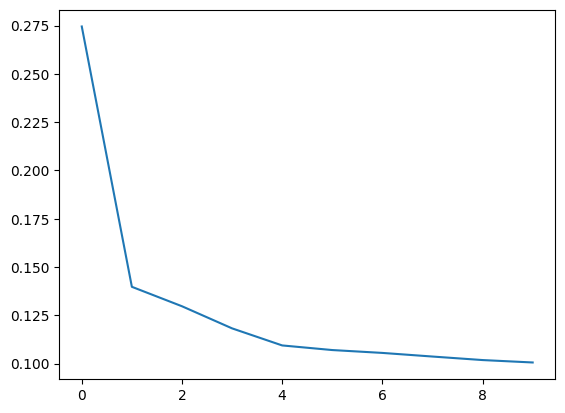

In [11]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()

Kaybın epochlar ilerledikçe nasıl yataylaştığını fark edin. Kayıp eğrisi bu şekilde yatay hale geldiğinde, bu modelin öğrenebileceği her şeyi öğrendiği ve ek epochlara devam etmenin bir anlamı olmadığı anlamına gelir.

**If you trained the model longer, would you expect the loss to decrease further?**

Modeli daha uzun süre eğitseydiniz, kaybın daha fazla azalmasını bekler miydiniz?

Bu, eğitim sırasında kaybın nasıl geliştiğine bağlıdır: eğer öğrenme eğrileri düzleşmişse, genellikle ek dönemler (epoch) boyunca eğitim yapmanın bir avantajı olmayacaktır. Aksine, kayıp hala azalıyor gibi görünüyorsa, daha uzun süre eğitim yapmak avantajlı olabilir.

Learning rate ve batch size ile şunlar üzerinde bir miktar kontrolünüz var:

1. Bir modelin eğitilmesinin ne kadar sürdüğü
2. Öğrenme eğrilerinin ne kadar gürültülü olduğu
3. Kaybın ne kadar küçüldüğü

Bu iki parametreyi daha iyi anlamak için, en basit sinir ağımız olan doğrusal modele bakacağız. Sadece tek bir weight ve bir bias sahip olduğu için, bir parametre değişikliğinin ne etkisi olduğunu görmek daha kolaydır.

**Kessinlikle kaggle da SGD alıştırmasının sonuna bak**

Muhtemelen daha küçük parti boyutlarının daha gürültülü ağırlık güncellemeleri ve kayıp eğrileri verdiğini gördünüz. Bunun nedeni, her partinin küçük bir veri örneği olması ve daha küçük örneklerin genellikle daha gürültülü tahminler vermesidir. Ancak, küçük partiler faydalı olabilecek bir "ortalama alma" etkisine sahip olabilir.

Daha küçük öğrenme oranları, güncellemeleri daha küçük yapar ve eğitimin yakınsaması daha uzun sürer. Büyük öğrenme oranları eğitimi hızlandırabilir, ancak bir minimuma tam olarak "yerleşemez". Öğrenme oranı çok büyük olduğunda, eğitim tamamen başarısız olabilir. (Bunu görmek için öğrenme oranını 0.99 gibi büyük bir değere ayarlamayı deneyin.)

![](image13.png)